In [1]:
#Reinforcement Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#importing the dataset
dataset=pd.read_csv(r'C:\Users\KIIT\Downloads\Ads_CTR_Optimisation.csv')

In [9]:
#initialising the variables
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*d
sums_of_rewards=[0]*d
total_reward=0
#upper confidence bound
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
            

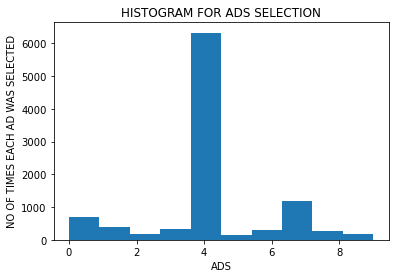

In [10]:
#visualising the histogram
plt.hist(ads_selected)
plt.title('HISTOGRAM FOR ADS SELECTION')
plt.xlabel("ADS")
plt.ylabel("NO OF TIMES EACH AD WAS SELECTED")
plt.show()